In [87]:
from scipy.io.wavfile import read
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, sys, re, pickle, glob
import urllib.request
import zipfile
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import IPython.display as ipd
from tqdm import tqdm
import librosa
import librosa.display
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,matthews_corrcoef,classification_report,ConfusionMatrixDisplay,confusion_matrix
from sklearn import tree

# **1 Author**

Student Name: Dhruv Verma

Student ID: 210879364

# **2 Problem formulation** 

The machine learning problem is in relation to MLEnd Hums and Whistles dataset, this work aims to solve binary classification, building a machine learning pipeline that takes as an input a Potter or StarWars audio samples and predicts its song and label.

# ****3 Machine Learning pipeline****

The below describes the machine learning pipeline:


### **Data Extraction/Data Preparation**

**Input:** the input audio data in .wav format derives from MLEnd Hums and Whistles Potter and StarWars  public dataset, totalling 417 Potter and 417 StarWars samples. 

### **Transformation:**

***Feature extraction*** is used to extract signal data from the input data. 


***Label Encoding*** converting Potter and StarWars categorical data to Boolean values (True and False).

**Feature Normalisation** the extracted features were normalised. 


### **Models:** 

A Support Vector Machine, KNN classification and a Decision Tree as the final estimator has been used as a model for prediction on the dataset. 

***Output***: Transformed data passed to the machine learning models for training and validation 



### **Model Evaluation:**

Model validation performance evaluated using classification metrics (f-score, precision and recall) and Matthews correlation coefficient (MCC). 

 



# **4 Transformation stage**:

As part of the transformation stage, the following was undertaken:
    
### **Feature extraction**:  

***Input: raw .wav data for Potter and Starwars (417 files for each label):***
    
The original data was in .wav format, in order to reduce dimensionality features were extracted using signal processing functions obtained from the Librosa library. The following features were extracted:
    
**Spectral Features**

1. Mel-frequency cepstral coefficients (MFCCs)(librosa.feature.mfcc)
2. Spectral bandwidth (librosa.feature.spectral_bandwidth)

**Onset Features**

1. Onset_strength (librosa.onset.onset_strength
    
**Beat and tempo Feature**

1. Tempo Estimation (librosa.beat.tempo)

    
***Output: The features extracted resulted in a 4-dimensional feature vector of features***



### **Feature scaling**:

***Input: Numerical Features:***

The features extracted were normalised. The reason for choosing this operation, is that the data from visual inspection was not normally distributed. The intention of using this approach was to preserve the shape of the data. 

***Output: 4 Dimesnional Normalised Feature Array***





# 5 Modelling


The following models were implemented:
1.  Support Vector Machine(SVM) Classification Algorithm
2.  KNN Classification Algorithm
3.  Decision Trees Classification

# **6 Methodology**


The below decribes how the data was trained and validated, including how accuracy was assessed. 


**Data Split:** : The data was split, namely: training data: training data list comprising of 70% of instances and validation data: comprising of 30% of instances. The randomisation of the training data and validation data were controlled using a random number generator, enabling a deterministic train-test to split to be achieved. The split was stratified such that a balanced proportion of each class was preserved.  

**Predictors and Labels**: An array of normalized features were used as predictors and 'Potter', 'StarWars' were used as y labels for the binary classification exercise.

**Model Training:** The models were trainined on the 70% training data split. A Support Vector Machine (SVM)classification algorithm , KNN classification and Decision Tress Classifier was used. 

1. ***Support Vector Machine (SVM)classification algorithm***:   Default parameters were used. C=1.0,kernel='rbf',gamma='scale'

2. ***K-NeighborsClassifier (KNN)***: To avoid ties, odd K numbers were used in a selection of parameters. k was set to 3.

3. ***DecisionTreesClassifier***: DecisionTreeClassifier is a class capable of performing multi-class classification on a dataset.

**Model Peformance:** After each model was fitted to the 70% training data split, it was validated on the 30% data split to assess performance. Each models performance was compared using a confusion matrix comparing precision, recall and macro avg f-score.  

A  ***Matthews Correlation Coefficient*** (MCC) testing the correlation between y true labels and y predicted labels. 

# 7. Data Preprocessing 

**Get Potter Path**

In [3]:
#show the potter path
potter_path = '/Users/dhruvverma/Desktop/ML mini project/Basic_sol/Potter'
potter_source=os.listdir(potter_path)
print(f'Total Potter files found: {len(potter_source)}')
potter_source.sort()

Potter_path_files='/Users/dhruvverma/Desktop/ML mini project/Basic_sol/Potter/*'
#store files in variable
Potter_contents=glob.glob(Potter_path_files)
#potter_source

Total Potter files found: 418


**Get StarWars Path**

In [5]:
#show the starwars path

starwars_path = '/Users/dhruvverma/Desktop/ML mini project/Basic_sol/StarWars'
starwars_source=os.listdir(starwars_path)
print(f'Total StarWars files found: {len(starwars_source)}')
starwars_source.sort()
#starwars_dir

StarWars_path_files='/Users/dhruvverma/Desktop/ML mini project/Basic_sol/StarWars/*'
#store files in variable
StarWars_contents=glob.glob(StarWars_path_files)

#Variable 'files' holds all available samples.

files = Potter_contents + StarWars_contents

Total StarWars files found: 418


**FIX INCONSISTENCIES**



In [6]:
MLENDHW_table = []

for file in Potter_contents:
    match1 = re.search("hum", file)
    match2 = re.search("Hum", file)
    fileName = file.split('/')[-1]
    interpreterID = ((file.split('/')[7]).split('_')[0])
    song = 'Potter'
    if match1 or match2:
        MLENDHW_table.append([fileName,interpreterID,'Hum',song])
    else:
        MLENDHW_table.append([fileName,interpreterID,'Whistle', song])

for file in StarWars_contents:
    match1 = re.search("hum", file)
    match2 = re.search("Hum", file)
    fileName = file.split('/')[-1]
    interpreterID = ((file.split('/')[7]).split('_')[0])
    song = 'StarWars'
    if match1 or match2:
        MLENDHW_table.append([fileName,interpreterID,'Hum',song])
    else:
        MLENDHW_table.append([fileName,interpreterID,'Whistle', song])


MLENDHW_table        

[['S54_hum_2_Potter.wav', 'S54', 'Hum', 'Potter'],
 ['S135_hum_2_Potter.wav', 'S135', 'Hum', 'Potter'],
 ['S36_hum_1_Potter.wav', 'S36', 'Hum', 'Potter'],
 ['S157_hum_1_Potter.wav', 'S157', 'Hum', 'Potter'],
 ['S169_hum_1_Potter.wav', 'S169', 'Hum', 'Potter'],
 ['S77_whistle_2_Potter.wav', 'S77', 'Whistle', 'Potter'],
 ['S53_hum_1_Potter.wav', 'S53', 'Hum', 'Potter'],
 ['S131_hum_1_[Potter].wav', 'S131', 'Hum', 'Potter'],
 ['S188_hum_2_Potter.wav', 'S188', 'Hum', 'Potter'],
 ['S31_hum_2_Potter.wav', 'S31', 'Hum', 'Potter'],
 ['S194_hum_1_[Potter].wav', 'S194', 'Hum', 'Potter'],
 ['S150_hum_2_Potter.wav', 'S150', 'Hum', 'Potter'],
 ['S35_hum_1_[Potter].wav', 'S35', 'Hum', 'Potter'],
 ['S126_whistle_2_Potter.wav', 'S126', 'Whistle', 'Potter'],
 ['S72_whistle_2_Potter.wav', 'S72', 'Whistle', 'Potter'],
 ['S197_hum_2_Potter.wav', 'S197', 'Hum', 'Potter'],
 ['S171_hum_2_Potter.wav', 'S171', 'Hum', 'Potter'],
 ['S209_whistle_2_Potter.wav', 'S209', 'Whistle', 'Potter'],
 ['S94_hum_1_Potter.wa

In [86]:
MLENDHW_df = pd.DataFrame(MLENDHW_table,columns=['file_id','participant','interpretation','song'])
MLENDHW_df['new_col'] = range(1, len(MLENDHW_df) + 1)

column_to_move = MLENDHW_df.pop("new_col")

# insert column with insert(location, column_name, column_value)

MLENDHW_df.insert(0, "new_col", column_to_move)
MLENDHW_df.set_index('new_col')
files[1]
print(MLENDHW_df)

     new_col                      file_id participant interpretation      song
0          1         S54_hum_2_Potter.wav         S54            Hum    Potter
1          2        S135_hum_2_Potter.wav        S135            Hum    Potter
2          3         S36_hum_1_Potter.wav         S36            Hum    Potter
3          4        S157_hum_1_Potter.wav        S157            Hum    Potter
4          5        S169_hum_1_Potter.wav        S169            Hum    Potter
..       ...                          ...         ...            ...       ...
829      830      S190_hum_2_StarWars.wav        S190            Hum  StarWars
830      831   S48_Whistle_2_Starwars.wav         S48        Whistle  StarWars
831      832      S135_hum_2_StarWars.wav        S135            Hum  StarWars
832      833  S133_whistle_2_StarWars.wav        S133        Whistle  StarWars
833      834      S156_hum_2_StarWars.wav        S156            Hum  StarWars

[834 rows x 5 columns]


In [8]:
potter=MLENDHW_df[MLENDHW_df['song'].str.contains('Potter')].count()
starwars=MLENDHW_df[MLENDHW_df['song'].str.contains('StarWars')].count()

potter_hum=MLENDHW_df[(MLENDHW_df["interpretation"]=='Hum') & (MLENDHW_df["song"]=='Potter')].count()
potter_whistle=MLENDHW_df[(MLENDHW_df["interpretation"]=='Whistle') & (MLENDHW_df["song"]=='Potter')].count()



starWars_hum=MLENDHW_df[(MLENDHW_df["interpretation"]=='Hum') & (MLENDHW_df["song"]=='StarWars')].count()
starWars_whistle=MLENDHW_df[(MLENDHW_df["interpretation"]=='Whistle') & (MLENDHW_df["song"]=='StarWars')].count()
print('-------------------------------')
print(f'The total Potter  count is: {potter.song}')
print(f'The total StarWars  count is: {starwars.song}')

print('-------------------------------')

print(f'The total Potter Hum count is: {potter_hum.song}')
print(f'The total StarWars Hum count is: {starWars_hum.song}')
print(f'The total Potter Whistle count is: {potter_whistle.song}')
print(f'The total StarWars Whistle count is: {starWars_whistle.song}')


-------------------------------
The total Potter  count is: 417
The total StarWars  count is: 417
-------------------------------
The total Potter Hum count is: 294
The total StarWars Hum count is: 304
The total Potter Whistle count is: 123
The total StarWars Whistle count is: 113


## **Data Exploration**

The graphs below shows the amplitude of data for Potter and StarWars samples.

As it can be clearly seen that amplitude pattern of Potter seems to differ than StarWars over time intervals. This could be used to as feature. 

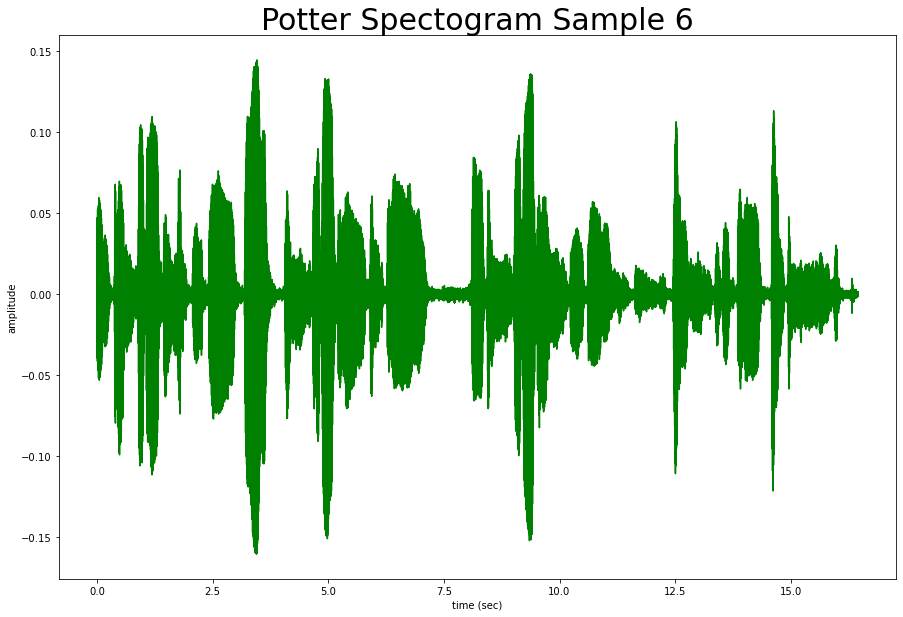

In [9]:
n=6

plt.figure(figsize=(15, 10))
fs = None # Sampling frequency. If None, fs would be 22050
x, sr = librosa.load(Potter_contents[n],sr=None)
t = np.arange(len(x))/sr
plt.plot(t,x,c='g')
plt.title(f'Potter Spectogram Sample {n}',size=30)
plt.xlabel('time (sec)')
plt.ylabel('amplitude')
plt.show()
print('\n')

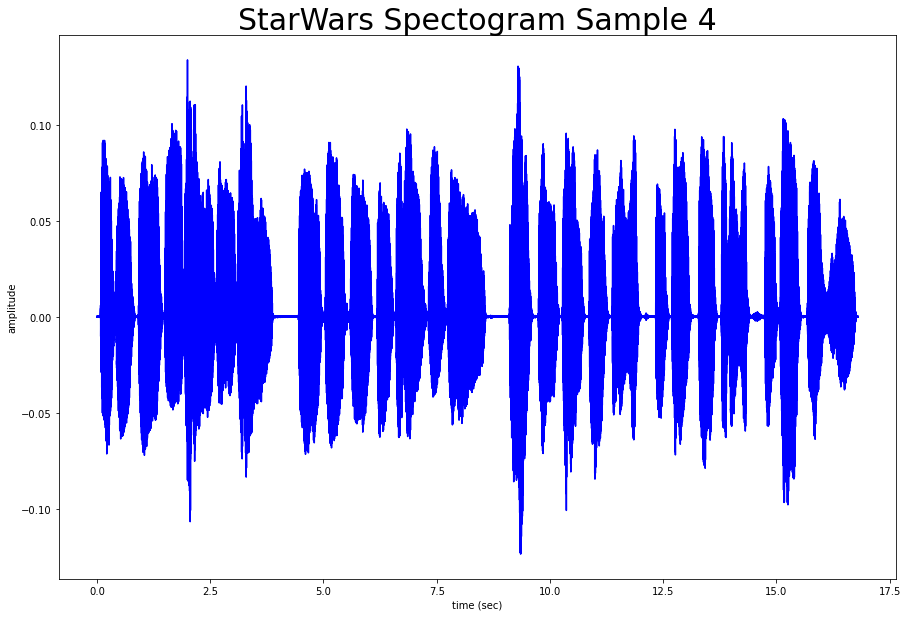

In [10]:
#play a selected song and show what it has been labled as in the below merged_frame
plt.figure(figsize=(15, 10))
n=4


#fs = None # Sampling frequency. If None, fs would be 22050
x, sr = librosa.load(StarWars_contents[n],sr=None)
t = np.arange(len(x))/sr
plt.plot(t,x,c='b')
plt.title(f'StarWars Spectogram Sample {n}',size=30)
plt.xlabel('time (sec)')
plt.ylabel('amplitude')
plt.show()
print('\n')

**Feature Extraction**

Extract features using the Librosa libary.

In [19]:
#lists of features
mfcc_list,onset_env_list,spec_bw_list,tempo_list=[],[],[],[]

for i in tqdm(range(len(MLENDHW_table))):
  n=i

  y, sr = librosa.load(files[n],sr=None)
    
  mfcc = librosa.feature.mfcc(y=y, sr=sr) 
  mfcc_list.append(np.mean(mfcc))  
  
  onset_env = librosa.onset.onset_strength(y=y, sr=sr)
  onset_env_list.append(np.mean(onset_env))
  
  spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
  spec_bw_list.append(np.mean(spec_bw))

  tempo = librosa.beat.tempo(y, sr=sr)
  tempo_list.append(tempo)

  0%|          | 0/834 [00:00<?, ?it/s]/var/folders/7m/hw2mlr112h941njyncfg62sr0000gn/T/ipykernel_883/2719261181.py:18: FutureWarning: Pass y=[0.00727844 0.00720215 0.00727844 ... 0.00028992 0.00054932 0.00061035] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  tempo = librosa.beat.tempo(y, sr=sr)
  0%|          | 1/834 [00:00<03:50,  3.61it/s]/var/folders/7m/hw2mlr112h941njyncfg62sr0000gn/T/ipykernel_883/2719261181.py:18: FutureWarning: Pass y=[ 0.0000000e+00 -1.5258789e-05  3.0517578e-05 ... -4.2205811e-02
 -4.2205811e-02 -4.2068481e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  tempo = librosa.beat.tempo(y, sr=sr)
  0%|          | 2/834 [00:00<03:20,  4.16it/s]/var/folders/7m/hw2mlr112h941njyncfg62sr0000gn/T/ipykernel_883/2719261181.py:18: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.01327515 -0.01332092
 -0.01330566] as keyword args. From version 0.10 pas

**Dataframe for each song and extracted feature**

In [20]:

#create dataframe with features and Labels
song=MLENDHW_df['song'].tolist()
df=pd.DataFrame(song,columns=['Song'])
df['mfcc']=mfcc_list
df['onset_env']=onset_env_list
df['Spec_Bandwidth']=spec_bw_list
df['tempo']=tempo_list
df

,Song,mfcc,onset_env,Spec_Bandwidth,tempo
0,Potter,-10.173121,1.065233,3065.836372,[161.4990234375]
1,Potter,-16.610855,0.560665,3182.265076,[151.99908088235293]
2,Potter,-23.337149,0.880137,2875.809809,[105.46875]
3,Potter,-22.288271,0.739635,3112.014194,[132.51201923076923]
4,Potter,-18.114054,1.032400,4246.476003,[126.04801829268293]
...,...,...,...,...,...
829,StarWars,-16.107616,1.109203,3112.467262,[103.359375]
830,StarWars,-19.168873,0.707281,3009.537678,[97.50884433962264]
831,StarWars,-15.271973,0.691629,2804.111606,[101.33272058823529]
832,StarWars,-17.962669,0.774645,4198.195722,[107.666015625]


**Understand Dataframe Datatypes**

Explore the dtypes of the extracted features 

In [21]:
print(df.dtypes)
# Get features and convert to float. 
features = df.iloc[:,1:7].astype(float)
features

Song               object
mfcc              float32
onset_env         float32
Spec_Bandwidth    float64
tempo              object
dtype: object


,mfcc,onset_env,Spec_Bandwidth,tempo
0,-10.173121,1.065233,3065.836372,161.499023
1,-16.610855,0.560665,3182.265076,151.999081
2,-23.337149,0.880137,2875.809809,105.468750
3,-22.288271,0.739635,3112.014194,132.512019
4,-18.114054,1.032400,4246.476003,126.048018
...,...,...,...,...
829,-16.107616,1.109203,3112.467262,103.359375
830,-19.168873,0.707281,3009.537678,97.508844
831,-15.271973,0.691629,2804.111606,101.332721
832,-17.962669,0.774645,4198.195722,107.666016


**Inspect Distribution of extracted features**

The features from visual inspection appear to **not to be** un-scaled. MinMaxScaler will be used to scale data later on. 

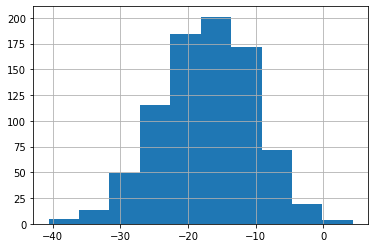

In [30]:
plt.hist(features['mfcc'])
plt.grid(True)
plt.show()

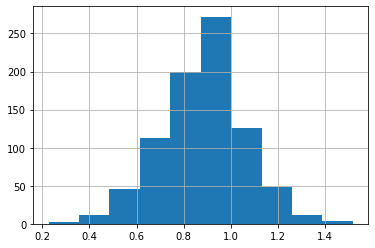

In [32]:
plt.hist(features['onset_env'])
plt.grid(True)
plt.show()

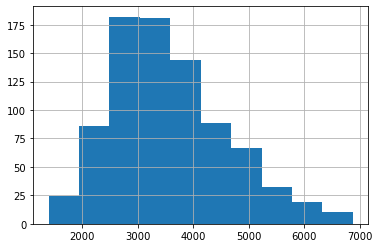

In [33]:
plt.hist(features['Spec_Bandwidth'])
plt.grid(True)
plt.show()

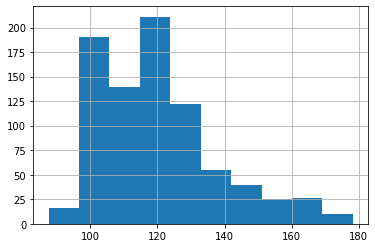

In [34]:
plt.hist(features['tempo'])
plt.grid(True)
plt.show()

**Get Target Labels**

In [35]:
# Get target from dataframe
target = df.iloc[:, 0]
target

0        Potter
1        Potter
2        Potter
3        Potter
4        Potter
         ...   
829    StarWars
830    StarWars
831    StarWars
832    StarWars
833    StarWars
Name: Song, Length: 834, dtype: object

**Feature Selection:**

**Features Correlation Coefficents**

The below correlation coefficients demonstrate that there is not a strong correlation between features, which means none will be removed. This is also shown in the heatmap below. 

In [36]:
print("\nCorrelation coefficients:")
corr=features.corr()
corr


Correlation coefficients:


,mfcc,onset_env,Spec_Bandwidth,tempo
mfcc,1.000000,0.316397,-0.192913,-0.110380
onset_env,0.316397,1.000000,0.138381,-0.188585
Spec_Bandwidth,-0.192913,0.138381,1.000000,0.065127
tempo,-0.110380,-0.188585,0.065127,1.000000


<AxesSubplot:>

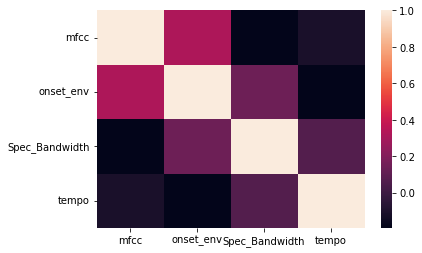

In [37]:
import seaborn as sns
sns.heatmap(corr)

As shown above, all features meet the threshold value of 0.5 and thus will be inluded.

**Create NumpPy Predictor array (X) and binary label(y)**

As shown below, there are 834 instances consisting of 4 features, stored in X and one binary label stored in y.

In [38]:
#convert features to np array and create X predictor variable
X=np.array(features)

#convert target to np array and store in y label binary variable (Potter = True, StarWars = False)
y=np.array(target)=='Potter'


print(f'The shape of the X predictor is {X.shape}')
print(f'The shape of the y label is {y.shape}')

The shape of the X predictor is (834, 4)
The shape of the y label is (834,)


# 8 Results


Different ML  algorithms create classifiers using different biases, which can lead to varying performance.   As such, a Support Vector Machine (SVM)classification algorithm, KNN classification and Decision Trees Classifier has been used below. 

**Split the data into training and validation**

In [39]:
#Data Split
                  
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)
                  
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((583, 4), (251, 4), (583,), (251,))

**Normalise the Data**

In [66]:
mean = X_train.mean(0)
sd =  X_train.std(0)

X_train_norm = (X_train-mean)/sd
X_val_norm  = (X_val-mean)/sd

## **Model 1: Support Vector Machine (SVM)**

**Fit the model and validate**

In [67]:
#set parameters
clf_svm = svm.SVC(C=1.0,kernel='rbf',gamma='scale')
#fit model to training data. 
clf_svm.fit(X_train_norm,y_train)
#print accuracy
print(f'Training Accuracy:{clf_svm.score(X_train_norm,y_train)}')
print(f'Validation Accuracy {clf_svm.score(X_val_norm,y_val)}')

Training Accuracy:0.8113207547169812
Validation Accuracy 0.7888446215139442


**SVM Classification Report**

As shown below, Potter had the best recall, resulting in a 81.13% of all labels being correctly predicted. However the predicted label Potter appears to be most confused with true label Starwars, resulting in the lowest precision. SVM matthews correlation coefficient  0.57 indicating correlation (A coefficient of +1 represents a perfect prediction, 0 an average random prediction and -1 an inverse prediction). 

In [68]:
SVM_y_preds=clf_svm.predict(X_val_norm)
SVM_y_preds=list(SVM_y_preds)


In [69]:
print(classification_report(y_val, SVM_y_preds,target_names=['StarWars','Potter']))
svm_train_accuracy=accuracy_score(y_val, SVM_y_preds)
svm_MC=matthews_corrcoef(y_val, SVM_y_preds)
print(f'\n SVM matthews_corrcoef : {svm_MC}')

              precision    recall  f1-score   support

    StarWars       0.81      0.76      0.78       126
      Potter       0.77      0.82      0.79       125

    accuracy                           0.79       251
   macro avg       0.79      0.79      0.79       251
weighted avg       0.79      0.79      0.79       251


 SVM matthews_corrcoef : 0.5786768460992975


**SVM CONFUSION MATRIX**

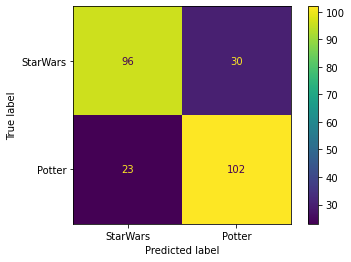

In [70]:
cm=confusion_matrix(y_val, SVM_y_preds)
cmd_obj=ConfusionMatrixDisplay(cm,display_labels=['StarWars','Potter'])
cmd_obj.plot()

## **Model 2: KNeighborsClassifier (KNN)**

**Fit the model and validate**

As shown below, the training model is overfitting as it it reporting a higher accuracy than the validation data. 3 ***k*** was number of neighbors was used. Validation Accuracy is lower than the SVM model above. Training accuracy is higher then the SVM model but there is more overfitting apparent.

In [71]:
knn = KNeighborsClassifier(3)
knn.fit(X_train_norm,y_train)

print(f'Training Accuracy:{knn.score(X_train_norm,y_train)}')
print(f'Validation Accuracy {knn.score(X_val_norm,y_val)}')

Training Accuracy:0.8662092624356775
Validation Accuracy 0.7250996015936255


As shown below, predicted label StarWars appears to be most confused with true label Potter (25 occurances where predicted StarWars label was confused with true label Potter). Predicted label Starwars had the best recall, resulting in a 86.62% of all Starwars true labels being correctly predicted.

**KNN Clasification Report**

In [72]:
knn_y_preds=knn.predict(X_val_norm)
knn_y_preds=list(knn_y_preds)
print(classification_report(y_val, knn_y_preds,target_names=['StarWars','Potter']))
knn_train_accuracy=accuracy_score(y_val, knn_y_preds) # print out accurate macro score
knn_MC=matthews_corrcoef(y_val, knn_y_preds)
print(f'\n KNN matthews_corrcoef : {knn_MC}')

              precision    recall  f1-score   support

    StarWars       0.72      0.74      0.73       126
      Potter       0.73      0.71      0.72       125

    accuracy                           0.73       251
   macro avg       0.73      0.73      0.73       251
weighted avg       0.73      0.73      0.73       251


 KNN matthews_corrcoef : 0.45026680099001254


**KNN Confusfion Matrix**

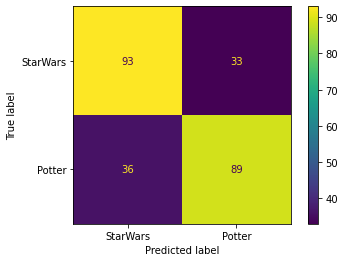

In [73]:
cm=confusion_matrix(y_val, knn_y_preds)
cmd_obj=ConfusionMatrixDisplay(cm,display_labels=['StarWars','Potter'])
cmd_obj.plot()

## **Model 3: Decision Trees Classifier:**

The Decision Tree below(with random state=3 and max depth = 2) did not provide any better results than the SVM classifier, but it gives out nearly equal training and validation accuracy.

Training Accuracy:0.7667238421955404
Validation Accuracy 0.7848605577689243


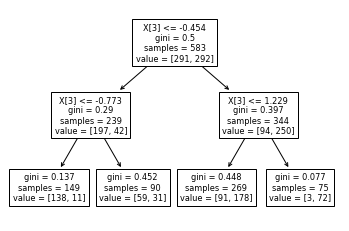

In [82]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(random_state=3, max_depth=2)
clf = clf.fit(X_train_norm,y_train)
tree.plot_tree(clf)
print(f'Training Accuracy:{clf.score(X_train_norm,y_train)}')
print(f'Validation Accuracy {clf.score(X_val_norm,y_val)}')

In [83]:
clf_y_preds=clf.predict(X_val_norm)
clf_y_preds=list(clf_y_preds)
print(classification_report(y_val, clf_y_preds,target_names=['StarWars','Potter']))
decisionTrees_classifier_train_accuracy=accuracy_score(y_val, clf_y_preds)
Tree_MC=matthews_corrcoef(y_val, clf_y_preds)
print(f'\n Decision Trees Classifier matthews_corrcoef : {Tree_MC}')

              precision    recall  f1-score   support

    StarWars       0.85      0.70      0.77       126
      Potter       0.74      0.87      0.80       125

    accuracy                           0.78       251
   macro avg       0.79      0.79      0.78       251
weighted avg       0.79      0.78      0.78       251


 Decision Trees Classifier matthews_corrcoef : 0.5789674221732772


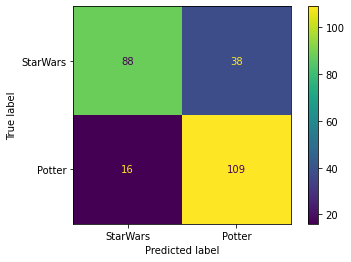

In [84]:
cm=confusion_matrix(y_val, clf_y_preds)
cmd_obj=ConfusionMatrixDisplay(cm,display_labels=['StarWars','Potter'])
cmd_obj.plot()

# 9 Conclusions

In [85]:
print('\n Performance Summary:')

print(f'\n SVM training accuracy : {svm_train_accuracy}')

print (f'\n KNN training accuracy : {knn_train_accuracy}')

print(f'\n Decision Trees Classifier training accuracy : {decisionTrees_classifier_train_accuracy}')

print('--------------------------------------------------------')

print(f'\n Matthews correlation coefficient:')
print(f'\n SVM matthews_corrcoef : {svm_MC}')

print(f'\n KNN matthews_corrcoef : {knn_MC}')


print(f'\n Decision Trees Classifier matthews_corrcoef : {Tree_MC}')
print('--------------------------------------------------------')


 Performance Summary:

 SVM training accuracy : 0.7888446215139442

 KNN training accuracy : 0.7250996015936255

 Decision Trees Classifier training accuracy : 0.7848605577689243
--------------------------------------------------------

 Matthews correlation coefficient:

 SVM matthews_corrcoef : 0.5786768460992975

 KNN matthews_corrcoef : 0.45026680099001254

 Decision Trees Classifier matthews_corrcoef : 0.5789674221732772
--------------------------------------------------------


## **Model Evaluation**: Summary 

As shown above, the **Decision Trees Classifier** and **SVM** , produced the **best accuracy (0.78)**. They also has the **highest MCC** of approx **0.578**. A coefficient of +1 represents a perfect prediction, 0 an average random prediction and -1 an inverse prediction. 
The **MCC score of 0.578** for the Decision Trees and SVM model **corroborates** either performance as the **best model** from the models tested. 


***It should be noted that the macro average recall and precision for each model has not seen any large differences, with all averaging 0.79 for both macro average precision and macro average recall***.
